In [8]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.inspection import permutation_importance 
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
X =pd.DataFrame(iris.data,columns = iris.feature_names)
Y=iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(Y_test,y_pred)
print("Accuracy before permutation",acc)

Accuracy before permutation 1.0


In [21]:
perm_importance = permutation_importance(model,X_test,Y_test,n_repeats=30,random_state=42)
feature_importance = perm_importance.importances_mean
feature_names = X.columns
for feature_name,importance in zip(feature_names,feature_importance):
    print(f"{feature_name}:{importance:}")

sepal length (cm):0.0
sepal width (cm):0.0
petal length (cm):0.23666666666666666
petal width (cm):0.20555555555555557


<BarContainer object of 4 artists>

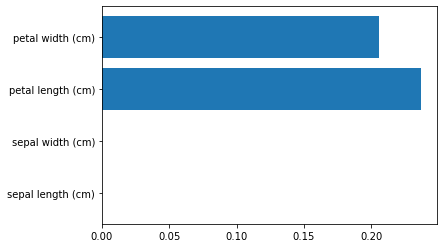

In [19]:
import matplotlib.pyplot as plt
plt.barh(feature_names,feature_importance)